Importing necessary modules

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

1. Read in the `coupons.csv` file

In [60]:
dat = pd.read_csv('/Users/vijayc/Downloads/mlai/PracticalApplicationM5/data/coupons.csv')
originalData = dat # Copied dataFrame to keep original copy(originalData) for anaysis.
dat.head(5)
originalData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.
   For columns that has mmissed values more than the threshold, drop the column from dataset
   Drop column that has null values greater than the threshold value of 20%.
   Based on this column named 'car' is dropped from the dataframe

In [63]:
originalData.isnull().sum()
tolerance_percentage = 0.20
missing_percentage = dat.isnull().mean()
data = dat.loc[:, missing_percentage <= tolerance_percentage]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

3. Decide what to do about your missing data -- drop, replace, other...
   For columns that has missed values less than threshold, fill those columns with max value count present in that column

In [66]:
data['Bar'].replace('', np.nan, inplace=True)
data['CoffeeHouse'].replace('', np.nan, inplace=True)
data['CarryAway'].replace('', np.nan, inplace=True)
data['RestaurantLessThan20'].replace('', np.nan, inplace=True)
data['Restaurant20To50'].replace('', np.nan, inplace=True)

Bar_mode_value = data['Bar'].mode()[0]
CoffeeHouse_mode_value = data['CoffeeHouse'].mode()[0]
CarryAway_mode_value = data['CarryAway'].mode()[0]
RestaurantLessThan20_mode_value = data['RestaurantLessThan20'].mode()[0]
Restaurant20To50_mode_value = data['Restaurant20To50'].mode()[0]

data['Bar'].fillna(data['Bar'].mode()[0], inplace=True)
data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0], inplace=True)
data['CarryAway'].fillna(data['CarryAway'].mode()[0], inplace=True)
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0], inplace=True)
data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0], inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

/var/folders/37/57j_cn6977g8yf3jkb_p01p80000gp/T/ipykernel_34958/1604988028.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bar'].replace('', np.nan, inplace=True)
/var/folders/37/57j_cn6977g8yf3jkb_p01p80000gp/T/ipykernel_34958/1604988028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bar'].replace('', np.nan, inplace=Tru

4. What proportion of the total observations chose to accept the coupon?

Portion of Total observations choose to use Coupon: 56.84326710816777


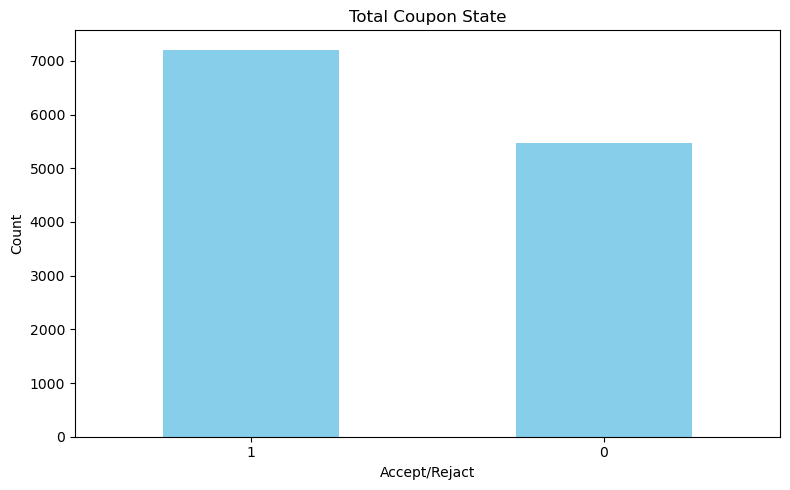

In [69]:
total_count = data.shape[0]
count_ones = (data['Y'] == 1).sum()
print("Portion of Total observations choose to use Coupon:", count_ones/total_count*100)
plt.figure(figsize=(8, 5))
value_counts = data['Y'].value_counts()
value_counts.plot(kind='bar', color='skyblue')
plt.title('Total Coupon State')
plt.xlabel('Accept/Rejact')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

5. Use a bar plot to visualize the `coupon` column

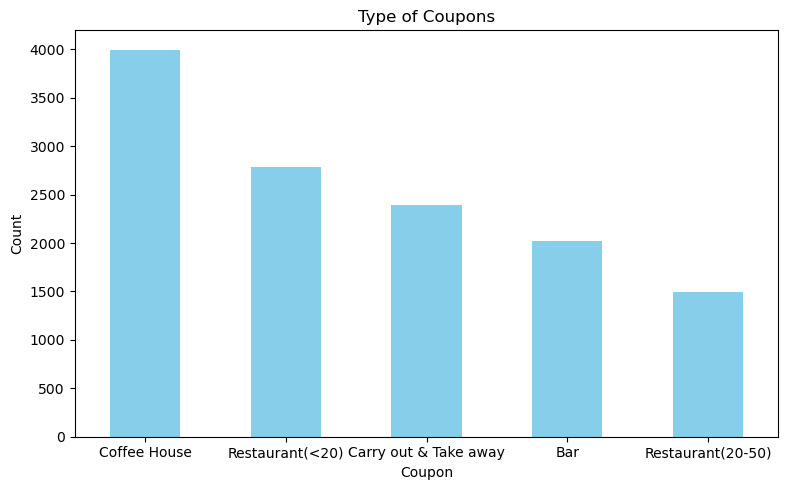

In [72]:
plt.figure(figsize=(8, 5))
value_counts = data['coupon'].value_counts()
value_counts.plot(kind='bar', color='skyblue')
plt.title('Type of Coupons')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Use a histogram plot to visualize the `temperature` column

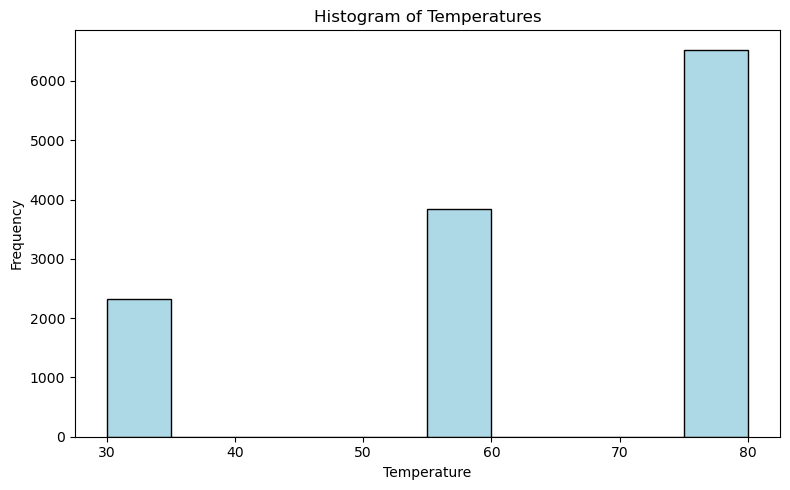

In [75]:
plt.figure(figsize=(8, 5))
plt.hist(data['temperature'], bins=10, color='lightblue', edgecolor='black')

# Step 2: Customize the plot
plt.title('Histogram of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**
Now, we will lead you through an exploration of just the bar related coupons.  
1. Create a new `DataFrame` that contains just the bar coupons
#data = pd.read_csv('/Users/vijayc/Downloads/mlai/PracticalApplicationM5/data/coupons.csv')

In [81]:
bar_df = data[data['coupon'] == 'Bar']
bar_df.head(5)
Total_bar_coupons = len(bar_df)
print("Total Bar coupons: ", Total_bar_coupons)

Total Bar coupons:  2017


2. What proportion of bar coupons were accepted?

Bar coupons accepted:  827
Portion of Bar coupons accepted are: 41.00148735746158


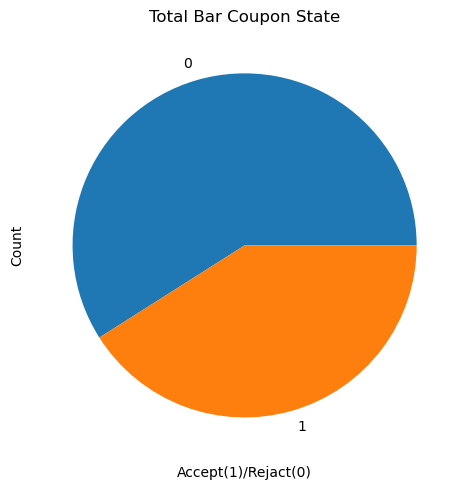

In [86]:
bar_coupon_accepted = bar_df[bar_df['Y'] == 1]
bar_coupon_accepted.head()
bar_coupon_accepted_count = len(bar_coupon_accepted)
print("Bar coupons accepted: ", bar_coupon_accepted_count)
portion_of_bar_coupons_accepted = bar_coupon_accepted_count / Total_bar_coupons
print("Portion of Bar coupons accepted are:", portion_of_bar_coupons_accepted*100)
plt.figure(figsize=(8, 5))
value_counts = bar_df['Y'].value_counts()
value_counts.plot(kind='pie', color='skyblue')
plt.title('Total Bar Coupon State')
plt.xlabel('Accept(1)/Rejact(0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [28]:
# For Info
bar_coupon_accepted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 13 to 12652
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           827 non-null    object
 1   passanger             827 non-null    object
 2   weather               827 non-null    object
 3   temperature           827 non-null    int64 
 4   time                  827 non-null    object
 5   coupon                827 non-null    object
 6   expiration            827 non-null    object
 7   gender                827 non-null    object
 8   age                   827 non-null    object
 9   maritalStatus         827 non-null    object
 10  has_children          827 non-null    int64 
 11  education             827 non-null    object
 12  occupation            827 non-null    object
 13  income                827 non-null    object
 14  Bar                   827 non-null    object
 15  CoffeeHouse           827 non-null    obje

Csustomers who went bar three or fewer times acceptance of coupon is:  81.4993954050786 
compared to 
Customers who went bar more than 4 times a month is:  18.500604594921402


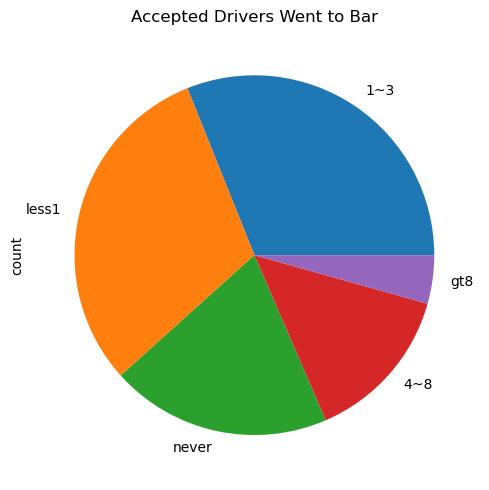

In [30]:
bar_four_and_more = bar_coupon_accepted[(bar_coupon_accepted['Bar'] == '4~8') | ( bar_coupon_accepted['Bar'] == 'gt8')]
bar_three_and_fewer = bar_coupon_accepted[(bar_coupon_accepted['Bar'] == '1~3') | ( bar_coupon_accepted['Bar'] == 'less1') | \
( bar_coupon_accepted['Bar'] == 'never')]
#print(len(bar_four_and_more))
#print(len(bar_three_and_fewer))
# Accepetance Rate for 
# ---- Who went bar three or fewer times a menth = (Who accepted and went to Bar three or fewer) / (Total Bar Coupons accepted) * 100
# ---- Who went bar four or more times a menth = (Who accepted and went to Bar four or more) / (Total Bar Coupons accepted) * 100

print("Csustomers who went bar three or fewer times acceptance of coupon is: ", len(bar_three_and_fewer)/ len(bar_coupon_accepted)*100,\
      "\ncompared to \nCustomers who went bar more than 4 times a month is: ", len(bar_four_and_more)/ len(bar_coupon_accepted)*100)

plt.figure(figsize=(8, 5))
value_counts = bar_coupon_accepted['Bar'].value_counts()
value_counts.plot(kind='pie', color='skyblue')
plt.title('Accepted Drivers Went to Bar')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

Customers who went bar more than once a month & (age < 25) acceptance rate is  42.4390243902439 
 compared to 
Customers who went bar more than once a month & (age > 25) acceptance rate is 71.21951219512195 

There is difference of  28.78048780487805


(0.0, 100.0)

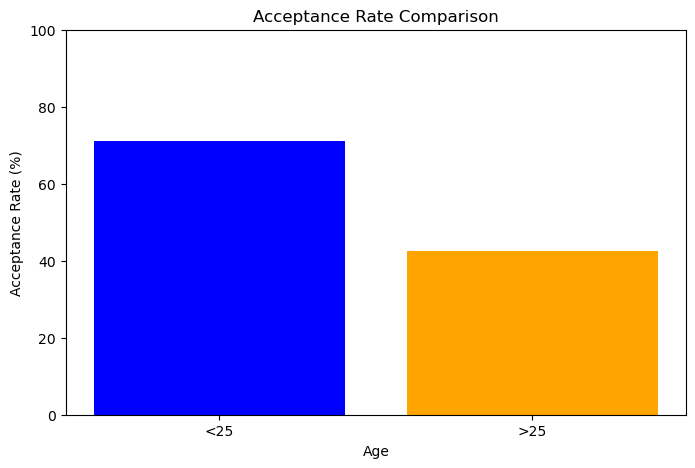

In [33]:
bar_one_and_more = bar_coupon_accepted[(bar_coupon_accepted['Bar'] == '1~3') | ( bar_coupon_accepted['Bar'] == '4~8') | \
( bar_coupon_accepted['Bar'] == 'gt8')]
#print(len(bar_one_and_more))
bar_one_and_more_below_age_25 = bar_one_and_more[(bar_one_and_more['age'] == '21') | (bar_one_and_more['age'] == 'below21')]
#print(len(bar_one_and_more_below_age_25))
bar_one_and_more_above_age_25 = len(bar_one_and_more) - len(bar_one_and_more_below_age_25)
#print(bar_one_and_more_above_age_25)
# Accepetance Rate for 
# ---- Who went bar morethan once and age > 25 (a) = (Who went morethan once and age > 25) / (Total Bar Coupons accepted) * 100
# ---- Who went bar morethan once and age < 25 (b) = (Who went morethan once and age < 25) / (Total Bar Coupons accepted) * 100

a = bar_one_and_more_above_age_25/len(bar_one_and_more)*100
b = ((bar_one_and_more_above_age_25/len(bar_one_and_more)-len(bar_one_and_more_below_age_25)/len(bar_one_and_more))*100)

print("Customers who went bar more than once a month & (age < 25) acceptance rate is ", b, \
      "\n compared to \nCustomers who went bar more than once a month & (age > 25) acceptance rate is", a, \
      "\n\nThere is difference of ", (a-b))


chart = {
    'age': ['<25', '>25'],  # Age 
    'Count': [a, b] # Driver Count
}
df = pd.DataFrame(chart)

plt.figure(figsize=(8, 5))
plt.bar(df['age'], df['Count'], color=['blue', 'orange'])
plt.title('Acceptance Rate Comparison')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry to all others (added this last statement "to all others" for clarity)

Accept Rate of Who went one or more with no pass kids & non Farming is  47.521160822249094 
compared to 
 Acceptance rate of all others is 52.4788391777509


(0.0, 100.0)

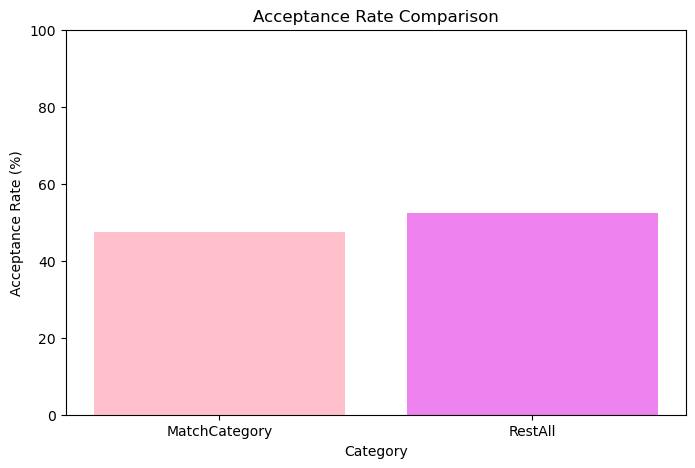

In [79]:
bar_one_and_more_noKidPassenger_NoFFF = bar_one_and_more[(bar_one_and_more['passanger'] != 'Kid(s)') & \
                                        (bar_one_and_more['occupation'] != 'Farming Fishing & Forestry')]
#print(len(bar_one_and_more_noKidPassenger_NoFFF))
Rest_of_bar_coupons_accepted = bar_coupon_accepted_count - len(bar_one_and_more_noKidPassenger_NoFFF)
#print(Rest_of_bar_coupons_accepted)
# Acceptance rate who went more than once without passengerKids and non Farming (c) = 
#                                   ("who went more than once without passengerKids and non Farming") / (Total accepted bar coupons) *100
# Acceptance rate for rest of driver (d) = 
#             (Total accepted bar coupons - "who went more than once without passengerKids and non Farming") / (who went more than once without passengerKids and no widows) * 100

c = len(bar_one_and_more_noKidPassenger_NoFFF)/bar_coupon_accepted_count*100
d = Rest_of_bar_coupons_accepted/bar_coupon_accepted_count*100
print("Accept Rate of Who went one or more with no pass kids & non Farming is ", c, "\ncompared to \n \
Acceptance rate of all others is",d) 


chart2 = {
    'cat': ['MatchCategory', 'RestAll'],  # Age 
    'pct': [c, d] # Driver Count
}
df2 = pd.DataFrame(chart2)

plt.figure(figsize=(8, 5))
plt.bar(df2['cat'], df2['pct'], color=['pink', 'violet'])
plt.title('Acceptance Rate Comparison')
plt.xlabel('Category')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [39]:
# who go to bars more than once a month, had passengers that were not a kid, and were not widowed
#bar_one_and_more.info()
bar_one_and_more_no_kidPassenger_notWidowed = bar_one_and_more[(bar_one_and_more['passanger'] != 'Kid(s)') & \
                                              (bar_one_and_more['maritalStatus'] != 'Widowed')]
# Print Answer
print("Acceptance rate of Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is:\n", \
      len(bar_one_and_more_no_kidPassenger_notWidowed)/bar_coupon_accepted_count*100)

Acceptance rate of Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is:
 47.521160822249094


In [41]:
# who go to bars more than once a month and are under the age of 30
bar_one_and_more_age_lessthan_30 = bar_one_and_more[(bar_one_and_more['age'] == '21') | \
                                   (bar_one_and_more['age'] == 'below21') | (bar_one_and_more['age'] == '26')]

# Print Answer
print("Acceptance rate of Drivers who go to bars more than once a month and are under the age of 30 is:\n", \
      len(bar_one_and_more_age_lessthan_30)/bar_coupon_accepted_count*100)


Acceptance rate of Drivers who go to bars more than once a month and are under the age of 30 is:
 30.10882708585248


In [43]:
# Who go to cheap restaurants more than 4 times a month and income is less than 50K
cheapRestaurant_df = data[(data['Y'] == 1) & (data['coupon'] == 'Restaurant(<20)')]
#print(len(cheapRestaurant_df))
cheapRestaurant_4andmore_income_50kless = cheapRestaurant_df[((cheapRestaurant_df['RestaurantLessThan20'] == '4~8') | \
                                                              (cheapRestaurant_df['RestaurantLessThan20'] == 'gt8')) & \
                                        ((cheapRestaurant_df['income'] == '$37500 - $49999') | \
                                        (cheapRestaurant_df['income'] == '$25000 - $37499') | \
                                         (cheapRestaurant_df['income'] == '$12500 - $24999') | \
                                         (cheapRestaurant_df['income'] == 'Less than $12500') )]  
# Print Answer
print("Acceptance rate of Drivers go to cheap restaurants more than 4 times a month and income is less than 50K is:\n", \
      len(cheapRestaurant_4andmore_income_50kless)/bar_coupon_accepted_count*100)




Acceptance rate of Drivers go to cheap restaurants more than 4 times a month and income is less than 50K is:
 43.409915356711004


(0.0, 100.0)

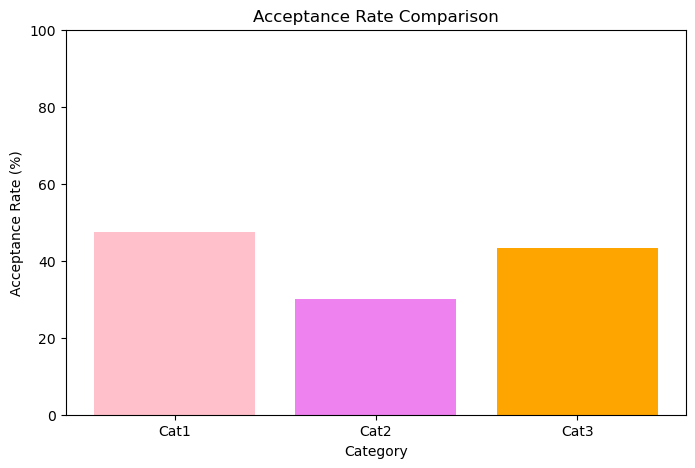

In [45]:
e = len(bar_one_and_more_no_kidPassenger_notWidowed)/bar_coupon_accepted_count*100
f = len(bar_one_and_more_age_lessthan_30)/bar_coupon_accepted_count*100
g = len(cheapRestaurant_4andmore_income_50kless)/bar_coupon_accepted_count*100

chart3 = {
    'cat': ['Cat1', 'Cat2', 'Cat3'],  # Category
    'pct': [e, f, g] # Driver Count
}
df3 = pd.DataFrame(chart3)

plt.figure(figsize=(8, 5))
plt.bar(df3['cat'], df3['pct'], color=['pink', 'violet', 'orange'])
plt.title('Acceptance Rate Comparison')
plt.xlabel('Category')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)

Investigating the Coffee House Coupons Now, we will lead you through an exploration of just the Coffee House related coupons.
Create a new DataFrame that contains just the Coffee House coupons

In [48]:
ch_df = data[data['coupon'] == 'Coffee House']
ch_df.head(5)
Total_ch_coupons = len(ch_df)
print("Total Coffee House coupons: ", Total_ch_coupons)

Total Coffee House coupons:  3996


2. What proportion of Coffee House coupons were accepted?

Coffee House coupons accepted:  1995
Portion of Coffee House coupons accepted are: 49.92492492492492


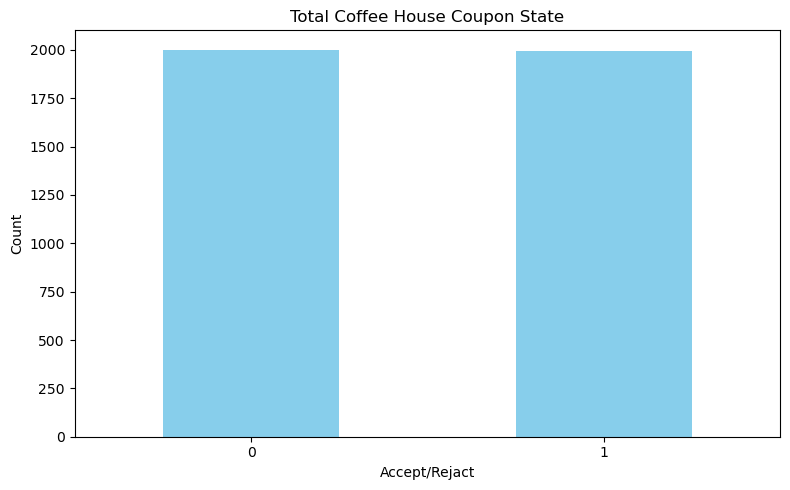

In [51]:
ch_coupon_accepted = ch_df[ch_df['Y'] == 1]
ch_coupon_accepted.head()
ch_coupon_accepted_count = len(ch_coupon_accepted)
print("Coffee House coupons accepted: ", ch_coupon_accepted_count)
portion_of_ch_coupons_accepted = ch_coupon_accepted_count / Total_ch_coupons
print("Portion of Coffee House coupons accepted are:", portion_of_ch_coupons_accepted*100)
plt.figure(figsize=(8, 5))
value_counts = ch_df['Y'].value_counts()
value_counts.plot(kind='bar', color='skyblue')
plt.title('Total Coffee House Coupon State')
plt.xlabel('Accept/Rejact')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

3. Compare the acceptance rate between those who went to a Coffee House 3 or fewer times a month to those who went more.

In [54]:
ch_coupon_accepted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, 12 to 12631
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1995 non-null   object
 1   passanger             1995 non-null   object
 2   weather               1995 non-null   object
 3   temperature           1995 non-null   int64 
 4   time                  1995 non-null   object
 5   coupon                1995 non-null   object
 6   expiration            1995 non-null   object
 7   gender                1995 non-null   object
 8   age                   1995 non-null   object
 9   maritalStatus         1995 non-null   object
 10  has_children          1995 non-null   int64 
 11  education             1995 non-null   object
 12  occupation            1995 non-null   object
 13  income                1995 non-null   object
 14  Bar                   1995 non-null   object
 15  CoffeeHouse           1995 non-null   obj

Csustomers who went CH three or fewer times acceptance of coupon is:  70.22556390977444 
compared to 
Customers who went CH more than 4 times a month is:  29.774436090225564


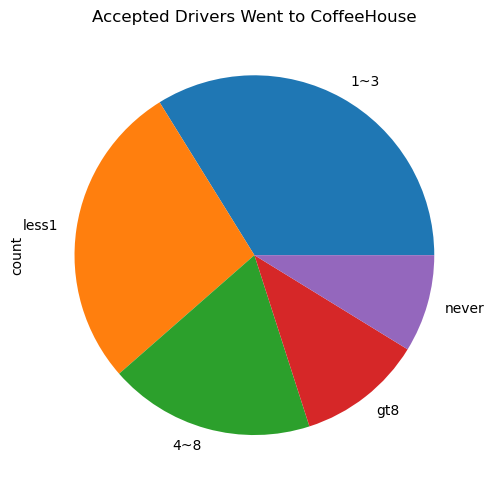

In [56]:
ch_four_and_more = ch_coupon_accepted[(ch_coupon_accepted['CoffeeHouse'] == '4~8') | ( ch_coupon_accepted['CoffeeHouse'] == 'gt8')]
ch_three_and_fewer = ch_coupon_accepted[(ch_coupon_accepted['CoffeeHouse'] == '1~3') | ( ch_coupon_accepted['CoffeeHouse'] == 'less1') | \
( ch_coupon_accepted['CoffeeHouse'] == 'never')]

# Accepetance Rate for 
# ---- Who went CH three or fewer times a menth = (Who accepted and went to CH three or fewer) / (Total CH Coupons accepted) * 100
# ---- Who went CH four or more times a menth = (Who accepted and went to CH four or more) / (Total CH Coupons accepted) * 100

print("Csustomers who went CH three or fewer times acceptance of coupon is: ", len(ch_three_and_fewer)/ len(ch_coupon_accepted)*100,\
      "\ncompared to \nCustomers who went CH more than 4 times a month is: ", len(ch_four_and_more)/ len(ch_coupon_accepted)*100)

plt.figure(figsize=(8, 5))
value_counts = ch_coupon_accepted['CoffeeHouse'].value_counts()
value_counts.plot(kind='pie', color='skyblue')
plt.title('Accepted Drivers Went to CoffeeHouse')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

4. Compare the acceptance rate between drivers who go to a CH more than once a month and are over the age of 25 to the all others.  Is there a difference?

Customers who went CH more than once a month & (age < 25) acceptance rate is  36.64302600472813 
 compared to 
Customers who went CH more than once a month & (age > 25) acceptance rate is 68.32151300236407 

There is difference of  31.678486997635943


(0.0, 100.0)

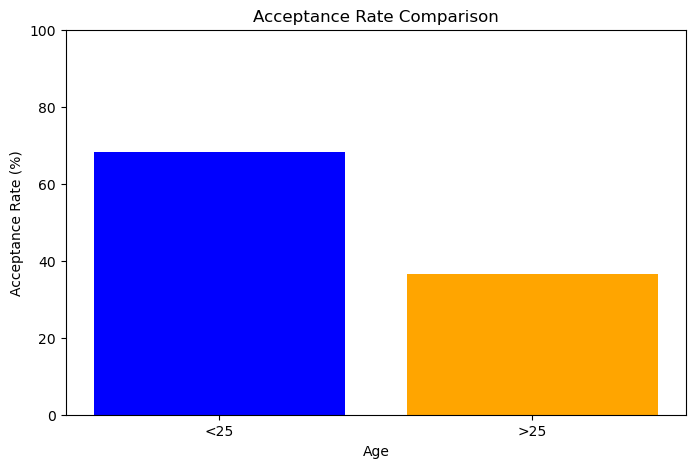

In [59]:
ch_one_and_more = ch_coupon_accepted[(ch_coupon_accepted['CoffeeHouse'] == '1~3') | ( ch_coupon_accepted['CoffeeHouse'] == '4~8') | \
( ch_coupon_accepted['CoffeeHouse'] == 'gt8')]
#print(len(ch_one_and_more))
ch_one_and_more_below_age_25 = ch_one_and_more[(ch_one_and_more['age'] == '21') | (ch_one_and_more['age'] == 'below21')]
#print(len(bar_one_and_more_below_age_25))
ch_one_and_more_above_age_25 = len(ch_one_and_more) - len(ch_one_and_more_below_age_25)
#print(ch_one_and_more_above_age_25)
# Accepetance Rate for 
# ---- Who went CH morethan once and age > 25 (a) = (Who went morethan once and age > 25) / (Total CH Coupons accepted) * 100
# ---- Who went CH morethan once and age < 25 (b) = (Who went morethan once and age < 25) / (Total CH Coupons accepted) * 100

a = ch_one_and_more_above_age_25/len(ch_one_and_more)*100
b = ((ch_one_and_more_above_age_25/len(ch_one_and_more)-len(ch_one_and_more_below_age_25)/len(ch_one_and_more))*100)

print("Customers who went CH more than once a month & (age < 25) acceptance rate is ", b, \
      "\n compared to \nCustomers who went CH more than once a month & (age > 25) acceptance rate is", a, \
      "\n\nThere is difference of ", (a-b))


chart = {
    'age': ['<25', '>25'],  # Age 
    'Count': [a, b] # Driver Count
}
df = pd.DataFrame(chart)

plt.figure(figsize=(8, 5))
plt.bar(df['age'], df['Count'], color=['blue', 'orange'])
plt.title('Acceptance Rate Comparison')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)

5. Use the same process to compare the acceptance rate between drivers who go to coffeehouse more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry to all others (added this last statement "to all others" for clarity)

Accept Rate of Who went one or more with no pass kids and no widows is  60.05012531328321 
compared to 
 Acceptance rate of all others is 39.94987468671679


(0.0, 100.0)

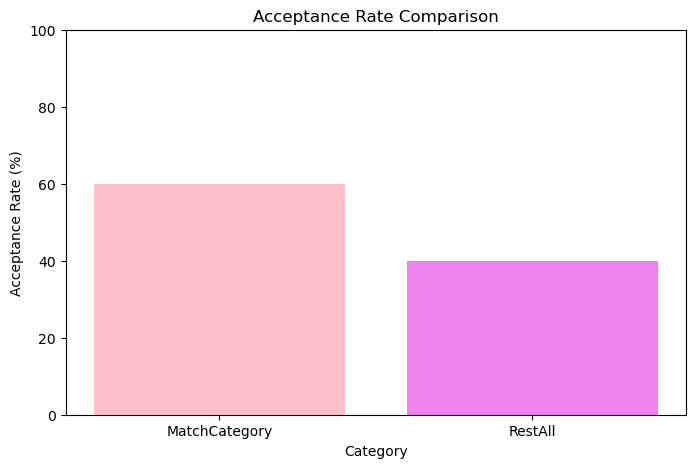

In [77]:
ch_one_and_more_noKidPassenger_NoFFF = ch_one_and_more[(ch_one_and_more['passanger'] != 'Kid(s)') & \
                                        (ch_one_and_more['occupation'] != 'Farming Fishing & Forestry')]
#print(len(ch_one_and_more_noKidPassenger_NoFFF))
Rest_of_ch_coupons_accepted = ch_coupon_accepted_count - len(ch_one_and_more_noKidPassenger_NoFFF)
#print(Rest_of_ch_coupons_accepted)
# Acceptance rate who went more than once without passengerKids and no widows (c) = 
#                                   ("who went more than once without passengerKids and no widows") / (Total accepted bar coupons) *100
# Acceptance rate for rest of driver (d) = 
#             (Total accepted CH coupons - "who went more than once without passengerKids and no widows") / (who went more than once without passengerKids and no widows) * 100

c = len(ch_one_and_more_noKidPassenger_NoFFF)/ch_coupon_accepted_count*100
d = Rest_of_ch_coupons_accepted/ch_coupon_accepted_count*100
print("Accept Rate of Who went one or more with no pass kids and no widows is ", c, "\ncompared to \n \
Acceptance rate of all others is",d) 


chart2 = {
    'cat': ['MatchCategory', 'RestAll'],  # Age 
    'pct': [c, d] # Driver Count
}
df2 = pd.DataFrame(chart2)

plt.figure(figsize=(8, 5))
plt.bar(df2['cat'], df2['pct'], color=['pink', 'violet'])
plt.title('Acceptance Rate Comparison')
plt.xlabel('Category')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)

6. Compare the acceptance rates between those drivers who:

- go to coffeehouse more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to coffeehouse more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [81]:
# who go to coffeehouse more than once a month, had passengers that were not a kid, and were not widowed
#bar_one_and_more.info()
ch_one_and_more_no_kidPassenger_notWidowed = ch_one_and_more[(ch_one_and_more['passanger'] != 'Kid(s)') & \
                                              (ch_one_and_more['maritalStatus'] != 'Widowed')]
# Print Answer
print("Acceptance rate of Drivers who go to coffeehouse more than once a month, \
    had passengers that were not a kid, and were not widowed is:\n", \
      len(ch_one_and_more_no_kidPassenger_notWidowed)/ch_coupon_accepted_count*100)


Acceptance rate of Drivers who go to coffeehouse more than once a month,     had passengers that were not a kid, and were not widowed is:
 60.05012531328321


In [83]:
# who go to coffeehouse more than once a month and are under the age of 30
ch_one_and_more_age_lessthan_30 = ch_one_and_more[(ch_one_and_more['age'] == '21') | \
                                   (ch_one_and_more['age'] == 'below21') | (ch_one_and_more['age'] == '26')]

# Print Answer
print("Acceptance rate of Drivers who go to coffeehouse more than once a month and are under the age of 30 is:\n", \
      len(ch_one_and_more_age_lessthan_30)/ch_coupon_accepted_count*100)



Acceptance rate of Drivers who go to coffeehouse more than once a month and are under the age of 30 is:
 34.03508771929825


In [69]:
# Who go to cheap restaurants more than 4 times a month and income is less than 50K
cheapRestaurant_df = data[(data['Y'] == 1) & (data['coupon'] == 'Restaurant(<20)')]
#print(len(cheapRestaurant_df))
cheapRestaurant_4andmore_income_50kless = cheapRestaurant_df[((cheapRestaurant_df['RestaurantLessThan20'] == '4~8') | \
                                                              (cheapRestaurant_df['RestaurantLessThan20'] == 'gt8')) & \
                                        ((cheapRestaurant_df['income'] == '$37500 - $49999') | \
                                        (cheapRestaurant_df['income'] == '$25000 - $37499') | \
                                         (cheapRestaurant_df['income'] == '$12500 - $24999') | \
                                         (cheapRestaurant_df['income'] == 'Less than $12500') )]  
# Print Answer
print("Acceptance rate of Drivers go to cheap restaurants more than 4 times a month and income is less than 50K is:\n", \
      len(cheapRestaurant_4andmore_income_50kless)/bar_coupon_accepted_count*100)



Acceptance rate of Drivers go to cheap restaurants more than 4 times a month and income is less than 50K is:
 43.409915356711004


(0.0, 100.0)

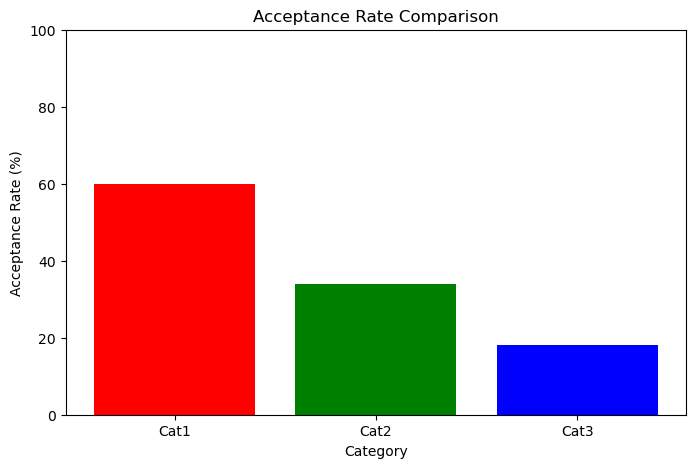

In [71]:
h = len(ch_one_and_more_no_kidPassenger_notWidowed)/ch_coupon_accepted_count*100
i = len(ch_one_and_more_age_lessthan_30)/ch_coupon_accepted_count*100
j = len(cheapRestaurant_4andmore_income_50kless)/ch_coupon_accepted_count*100

chart3 = {
    'cat': ['Cat1', 'Cat2', 'Cat3'],  # Category
    'pct': [h, i, j] # Driver Count
}
df3 = pd.DataFrame(chart3)

plt.figure(figsize=(8, 5))
plt.bar(df3['cat'], df3['pct'], color=['red', 'green', 'blue'])
plt.title('Acceptance Rate Comparison')
plt.xlabel('Category')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 100)

